In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# log_data = pd.read_table(r"~\Documents\Uni\GESIS_venv\data\log raw text.txt", 
#                          sep="\,\t", engine='python',
#                          header=1, names=names, 
#                          on_bad_lines='skip'
#                          #nrows=50000
#                          )

In [3]:
# for id, df_i in enumerate(np.array_split(log_data, 10)):
#     df_i.to_csv(r"~\Documents\Uni\GESIS_venv\data\logs_{id}.csv".format(id=id))



In [3]:
names = ['id', 'session', 'timestamp', 'action_type', 'action_parameter', 'gesis_member', 'mode']

In [4]:
# Data available on request
log_data_0 = pd.read_csv(r"~\Documents\Uni\GESIS_venv\data\logs_0.csv",
                           header=1, names=names,
                           on_bad_lines='skip')

In [5]:
log_data_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465617 entries, 1 to 465617
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                465617 non-null  object 
 1   session           465510 non-null  object 
 2   timestamp         465510 non-null  object 
 3   action_type       465491 non-null  object 
 4   action_parameter  465491 non-null  object 
 5   gesis_member      465472 non-null  float64
 6   mode              465472 non-null  object 
dtypes: float64(1), object(6)
memory usage: 28.4+ MB


In [6]:
log_data_0.head(10)

,id,session,timestamp,action_type,action_parameter,gesis_member,mode
1,(11654688,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:37','search',"'\""left behind\"";\""{\""query\"":{\""bool\"":{\""mus...",0.0,"'default'),"
2,(11654687,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:26','search',"'\""kultur \"";\""{\""from\"":20,\""query\"":{\""bool\...",0.0,"'default'),"
3,(11654686,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:20','open_linked_resources_section','research_data',0.0,"'default'),"
4,(11654684,'dud7p4loe84ef48eh8sbaiigmv','2023-02-14 09:46:18','search',"'\""\"";\""{\""query\"":{\""bool\"":{\""must\"":{\""matc...",0.0,"'default'),"
5,(11654685,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:18','open_linked_resources_section','research_data',0.0,"'default'),"
6,(11654683,'dud7p4loe84ef48eh8sbaiigmv','2023-02-14 09:46:18','change_tab','gesis_bib',0.0,"'default'),"
7,(11654682,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:16','view_record','exploredata-ZA7702_Varq125d;1 related objects...,0.0,"'default'),"
8,(11654681,'cpsn5qldr8h8tujcm3hm8tubr7','2023-02-14 09:46:12','search',"'\""eurobarometer 465\"";\""{\""query\"":{\""bool\"":...",1.0,"'default'),"
9,(11654679,'cpsn5qldr8h8tujcm3hm8tubr7','2023-02-14 09:46:10','search',"'\""eurobarometer 465\"";\""{\""query\"":{\""bool\"":...",1.0,"'default'),"
10,(11654680,'cpsn5qldr8h8tujcm3hm8tubr7','2023-02-14 09:46:10','choose_category_from_fold_out','research_data',1.0,"'default'),"


In [7]:
log_data_0.value_counts(subset='action_type')

action_type
'search'                             179578
'view_record'                         75463
'dataset_popup'                       22271
'search_change_facets'                21984
'search_change_paging'                18441
                                      ...  
'order_gesis_bib'                         6
''                                        1
'goto_missy'                              1
'goto_gml'                                1
'Î ôËåuÿpovõqªZ­©°‘íçÍ¬f¡×yö®–'         1
Name: count, Length: 62, dtype: int64

In [8]:
searches = log_data_0[log_data_0['action_type']=='\'search\'']
searches = searches.reset_index(drop=True)
searches

,id,session,timestamp,action_type,action_parameter,gesis_member,mode
0,(11654688,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:37','search',"'\""left behind\"";\""{\""query\"":{\""bool\"":{\""mus...",0.0,"'default'),"
1,(11654687,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:26','search',"'\""kultur \"";\""{\""from\"":20,\""query\"":{\""bool\...",0.0,"'default'),"
2,(11654684,'dud7p4loe84ef48eh8sbaiigmv','2023-02-14 09:46:18','search',"'\""\"";\""{\""query\"":{\""bool\"":{\""must\"":{\""matc...",0.0,"'default'),"
3,(11654681,'cpsn5qldr8h8tujcm3hm8tubr7','2023-02-14 09:46:12','search',"'\""eurobarometer 465\"";\""{\""query\"":{\""bool\"":...",1.0,"'default'),"
4,(11654679,'cpsn5qldr8h8tujcm3hm8tubr7','2023-02-14 09:46:10','search',"'\""eurobarometer 465\"";\""{\""query\"":{\""bool\"":...",1.0,"'default'),"
...,...,...,...,...,...,...,...
179573,(11189230,'ev65vv1pkkgg5cvul4l76iai6o','2023-01-11 10:54:19','search',"'\""miks\"";\""{\""query\"":{\""bool\"":{\""must\"":[{\...",1.0,"'default'),"
179574,(11189223,'9ekhgcs76ujn4of5kdr0jnicgl','2023-01-11 10:54:14','search',"'\""\""The effects of question, respondent and i...",0.0,"'default'),"
179575,(11189219,'ev65vv1pkkgg5cvul4l76iai6o','2023-01-11 10:54:12','search',"'\""miks\"";\""{\""query\"":{\""bool\"":{\""must\"":[{\...",1.0,"'default'),"
179576,(11189211,'9ekhgcs76ujn4of5kdr0jnicgl','2023-01-11 10:53:55','search',"'\""\""The effects of question, respondent and i...",0.0,"'default'),"


In [9]:
searches['action_parameter'] = searches['action_parameter'].astype('string')
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179578 entries, 0 to 179577
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                179578 non-null  object 
 1   session           179578 non-null  object 
 2   timestamp         179578 non-null  object 
 3   action_type       179578 non-null  object 
 4   action_parameter  179578 non-null  string 
 5   gesis_member      179559 non-null  float64
 6   mode              179559 non-null  object 
dtypes: float64(1), object(5), string(1)
memory usage: 9.6+ MB


In [10]:
searches_text = searches[searches['action_parameter'].str.contains("query_string")==True]
searches_text = searches_text.reset_index(drop=True)
searches_text

,id,session,timestamp,action_type,action_parameter,gesis_member,mode
0,(11654688,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:37','search',"'\""left behind\"";\""{\""query\"":{\""bool\"":{\""mus...",0.0,"'default'),"
1,(11654687,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:26','search',"'\""kultur \"";\""{\""from\"":20,\""query\"":{\""bool\...",0.0,"'default'),"
2,(11654681,'cpsn5qldr8h8tujcm3hm8tubr7','2023-02-14 09:46:12','search',"'\""eurobarometer 465\"";\""{\""query\"":{\""bool\"":...",1.0,"'default'),"
3,(11654679,'cpsn5qldr8h8tujcm3hm8tubr7','2023-02-14 09:46:10','search',"'\""eurobarometer 465\"";\""{\""query\"":{\""bool\"":...",1.0,"'default'),"
4,(11654678,'dejum81g52qcpnf0k255ad9c8g','2023-02-14 09:46:10','search',"'\""kultur \"";\""{\""from\"":20,\""query\"":{\""bool\...",0.0,"'default'),"
...,...,...,...,...,...,...,...
132169,(11189230,'ev65vv1pkkgg5cvul4l76iai6o','2023-01-11 10:54:19','search',"'\""miks\"";\""{\""query\"":{\""bool\"":{\""must\"":[{\...",1.0,"'default'),"
132170,(11189223,'9ekhgcs76ujn4of5kdr0jnicgl','2023-01-11 10:54:14','search',"'\""\""The effects of question, respondent and i...",0.0,"'default'),"
132171,(11189219,'ev65vv1pkkgg5cvul4l76iai6o','2023-01-11 10:54:12','search',"'\""miks\"";\""{\""query\"":{\""bool\"":{\""must\"":[{\...",1.0,"'default'),"
132172,(11189211,'9ekhgcs76ujn4of5kdr0jnicgl','2023-01-11 10:53:55','search',"'\""\""The effects of question, respondent and i...",0.0,"'default'),"


In [11]:
def get_search_text(searches):
    records = []
    for count in range(len(searches)):
        split_1 = searches['action_parameter'][count].replace('\\', '').split(';')[0].replace('\'', '').replace('\"', '')
        records.append(split_1.strip())
        # if count > 20:
        #     break
    search_text_df = pd.DataFrame(records)
    return search_text_df

In [12]:
searches_df = get_search_text(searches_text)

In [13]:
searches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132174 entries, 0 to 132173
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       132174 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB


In [14]:
searches_df.rename(columns={0:"search_string"}, errors="raise", inplace=True)

In [15]:
searches_df.sort_values(by="search_string")

,search_string
53514,
35404,
35402,
117022,
78568,
...,...
73349,ï½’
51045,ï‚§\tKurzskala fÃ¼r interpersonales Vertrauen ...
51031,ï‚§\tPropensity to Trust Survey
51034,ï‚§\tPropensity to Trust Survey


In [16]:
searches_df = searches_df[(searches_df['search_string']=='')==False]

In [17]:
searches_df = searches_df.reset_index(drop=True)
searches_df

,search_string
0,left behind
1,kultur
2,eurobarometer 465
3,eurobarometer 465
4,kultur
...,...
132119,miks
132120,"The effects of question, respondent and interv..."
132121,miks
132122,"The effects of question, respondent and interv..."


In [8]:
def count_tokens(search_df):
    records = {}
    for count in range(len(search_df)):
        tokens = nltk.tokenize.word_tokenize(search_df['search_string'][count])
        tok_count = len(tokens)
        records[count] = {}
        records[count].update({
            'search_string':search_df['search_string'][count],
            'tokens_count':tok_count
        })
        # if count >2:
        #     break
    records_df = pd.DataFrame(records).T
    return records_df

In [19]:
search_tokens = count_tokens(searches_df)

In [20]:
search_tokens.sort_values(by='tokens_count')

,search_string,tokens_count
66061,Arbeitszufriedenheit,1
100360,Sozi,1
54722,lazarus,1
54721,lazarus,1
54720,lazarus,1
...,...,...
27984,The European Values Study is a transnational e...,49
27986,The European Values Study is a transnational e...,49
27979,The European Values Study is a transnational e...,49
93017,Permissions RESEARCH RESEARCH ARTICLE Harassm...,58


In [21]:
search_tokens['tokens_count'].mean()

1.9741303623868487

In [22]:
token_counts = search_tokens['tokens_count'].value_counts()

In [38]:
token_counts.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 10, 12, 13, 17, 16, 14, 15, 19,
       18, 41, 40, 20, 21, 25, 42, 23, 24, 22, 30, 27, 33, 43, 29, 47, 49, 35,
       34, 58, 26, 32, 46, 28, 36, 45, 44, 38],
      dtype='object', name='tokens_count')

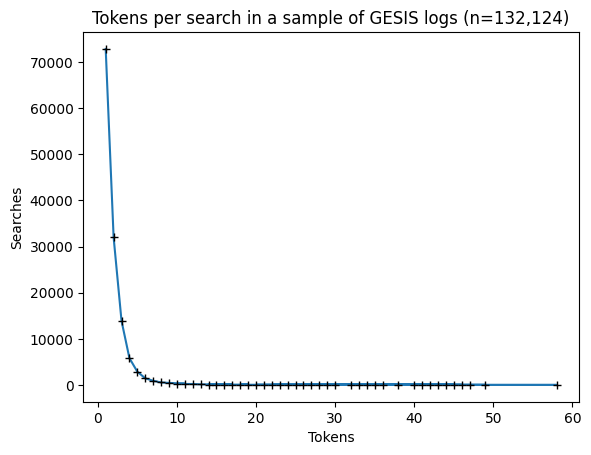

In [62]:
plt.plot(token_counts, '-', token_counts, 'k+')
plt.xlabel('Tokens')
plt.ylabel('Searches')
plt.title('Tokens per search in a sample of GESIS logs (n=132,124)')
plt.savefig('tokens_per_search.png', format='png')

In [53]:
orcas_sample = pd.read_csv('./files to colab/queries_smol.csv')

In [54]:
orcas_sample

,Unnamed: 0,qid,query
0,0,7267365,10 day weather fresno ca
1,1,5948492,10000 pounds to tons
2,2,7765461,13q deletion
3,3,10865189,1950 america
4,4,12164412,20 in french
...,...,...,...
1078,1078,3494787,zipcruiter.com
1079,1079,8800521,zpd vygotsky's theory
1080,1080,8321731,zwanger pesiri patient forms online
1081,1081,7822156,Ã£Â«Ã£Ã£


In [55]:
orcas_sample = orcas_sample.rename({'query': 'search_string'}, axis=1).drop(['Unnamed: 0', 'qid'], axis=1)

In [56]:
orcas_sample['search_string'] = orcas_sample['search_string'].astype('str')

In [57]:
orcas_sample

,search_string
0,10 day weather fresno ca
1,10000 pounds to tons
2,13q deletion
3,1950 america
4,20 in french
...,...
1078,zipcruiter.com
1079,zpd vygotsky's theory
1080,zwanger pesiri patient forms online
1081,Ã£Â«Ã£Ã£


In [58]:
orcas_tokens = count_tokens(orcas_sample)

In [59]:
orcas_tokens['tokens_count'].mean()

3.2668513388734994

In [60]:
orcas_tokens.sort_values(by='tokens_count', inplace=True)

In [61]:
orcas_token_counts = orcas_tokens['tokens_count'].value_counts()

In [66]:
orcas_token_counts.sort_index(inplace=True)

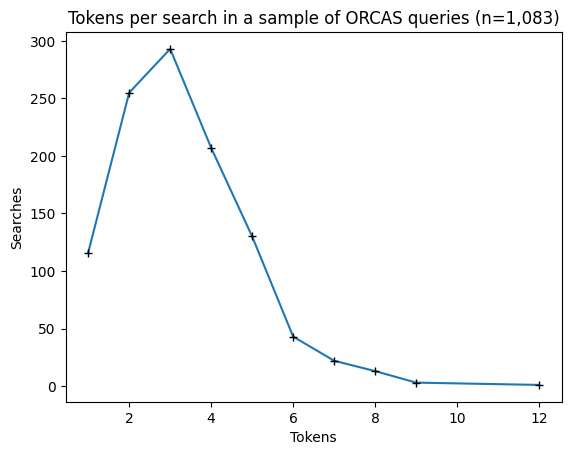

In [67]:
plt.plot(orcas_token_counts, '-', orcas_token_counts, 'k+')
plt.xlabel('Tokens')
plt.ylabel('Searches')
plt.title('Tokens per search in a sample of ORCAS queries (n=1,083)')
plt.savefig('orcas_tokens_per_search.png', format='png')